Exploratory Data Analysis (EDA) или разведочный анализ данных играет важнейшую роль после получения набора данных. Выделим некоторые составляющие этого процесса:

– понимание структуры и характеристик набора данных;

– редактирование данных, исправление ошибок;

– ручное, автоматическое или их комбинация;

– работа с пропущенными значениями;

– нормализация;

– подготовка данных для дальнейших этапов анализа.


In [ ]:
import pandas as pd
FinRisk = pd.read_csv('Loan.csv') # Считываем наш датафрейм из csv файла
FinRisk

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [ ]:
FinRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
FinRisk.LoanPurpose.unique()

array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)

In [ ]:
FinRisk.LoanPurpose.value_counts() #Статус одобрения кредита

,count
LoanPurpose,
Home,5925
Debt Consolidation,5027
Auto,4034
Education,3008
Other,2006


Корреляционный анализ помогает понять, какие переменные взаимосвязаны между собой и насколько сильна эта связь. Коэффициент корреляции измеряет степень линейной зависимости между двумя переменными, значения которой находятся в диапазоне от -1 до 1.
Корреляционная матрица, представленная в виде тепловой карты, способна помочь с выбором признаков на основе соответствующих линейных корреляций


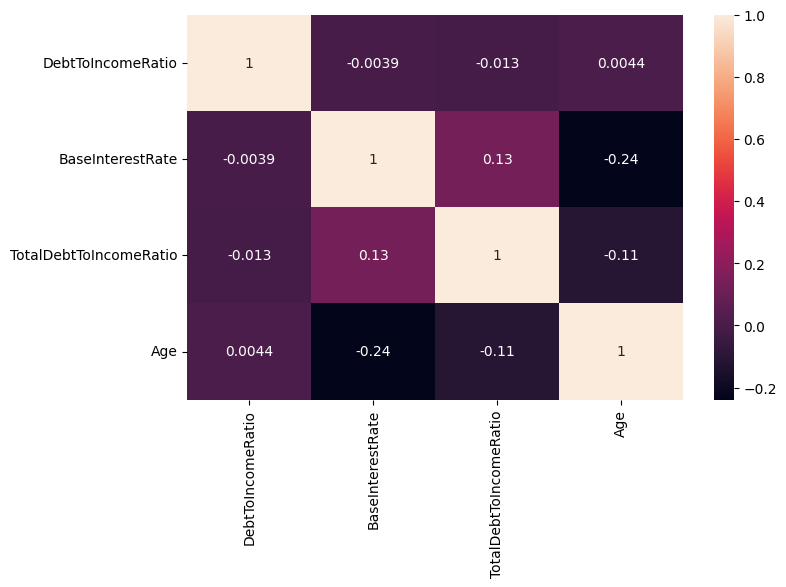

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['DebtToIncomeRatio' , 'BaseInterestRate', 'TotalDebtToIncomeRatio', 'Age']

plt.figure(figsize=[8, 5])
sns.heatmap(FinRisk[cols].corr(), annot=True);


Основные статистические показатели можно разделить на две группы:  
1. меры среднего уровня  
2. меры рассеяния.

Меры среднего уровня:
o Среднее значение
o Стандартная ошибка
o Стандартное отклонение
o Эксцесс
o Асимметрия
o Интервал
o Минимум
o Максимум
o Счёт
o Медиана
o Мода
o Квантиль
o Математическое ожидание
o Доверительный интервал

Метод describe() – выводит описательные статистики по числовым столбцам датафрейма. Описательные статистики включают в себя:

* count – количество не пустых значений;
* mean – среднее арифметическое;
* std – дисперсия;
* min, max – минимум и максимум в столбце;
* 25%, 50%, 75% – соответствующие квартили, где квартиль 50% – это медиана.

Метод describe() автоматически исключает NaN значения при подсчёте статистик, при их наличии.

In [ ]:
FinRisk.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


«Ящик с усами» в статистике — это график, который позволяет компактно и наглядно представлять основные характеристики статистической выборки данных: распределение данных между квартилями, среднее значение, медиану, максимальное и минимальное значения, а также выбросы данных.

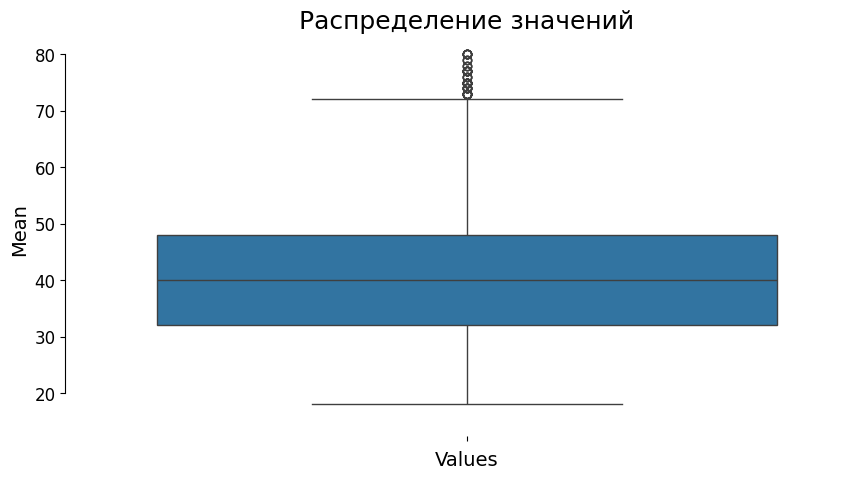

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=FinRisk['Age'])
sns.despine(offset=10, trim=True)
plt.title('Распределение значений', fontsize = 18)
plt.xlabel('Values', fontsize = 14)
plt.ylabel('Mean', fontsize = 14)
plt.tick_params(axis='both', which = 'major', labelsize=12)
plt.show()

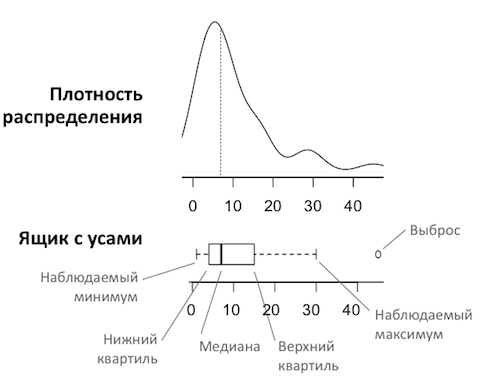

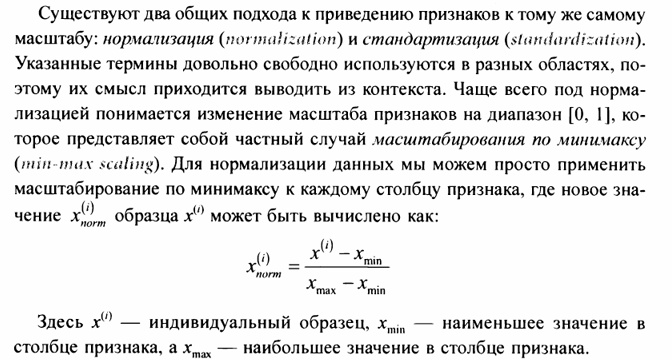

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X1= FinRisk.iloc[:,[7, 8]].values
mms = MinMaxScaler()
X1_MinMaxScaler = mms.fit_transform(X1)
X1_MinMaxScaler


array([[0.05234787, 0.33333333],
       [0.12355709, 0.33333333],
       [0.0770637 , 0.22222222],
       ...,
       [0.18424483, 0.55555556],
       [0.061229  , 0.55555556],
       [0.15675088, 0.33333333]])

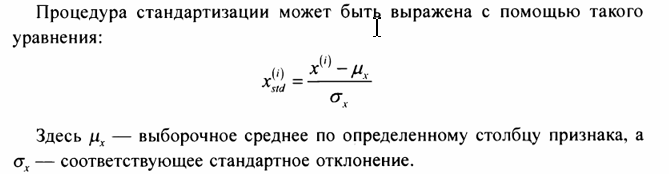

In [ ]:
from sklearn.preprocessing import scale
X1_scaled = scale(X1)
X1_scaled

array([[-0.87367194, -0.24557821],
       [ 0.08655134, -0.24557821],
       [-0.54039038, -0.73211255],
       ...,
       [ 0.90489721,  0.72749048],
       [-0.753914  ,  0.72749048],
       [ 0.53415406, -0.24557821]])

Визуализация важных характеристик набора данных может помочь визуально обнаружить наличие выбросов, увидеть распределение данных и уловить взаимосвязи между признаками.

Создадим матрицу графиков рассеяния, которая позволит визуализировать в одном месте попарные взаимосвязи между разными признаками в наборе данных. Матрица графиков рассеяния дает нам полезную графическую информацией по взаимосвязям в наборе данных. С помощью матрицы графиков рассеяния можно быстро оценить распределение данных и содержание выбросов.

**Нормальное распределение**

Нормальное распределение описывает процессы, где результат является суммой
многих случайных величин, каждая из которых слабо зависит от другой и вносит
сравнительно небольшой вклад.

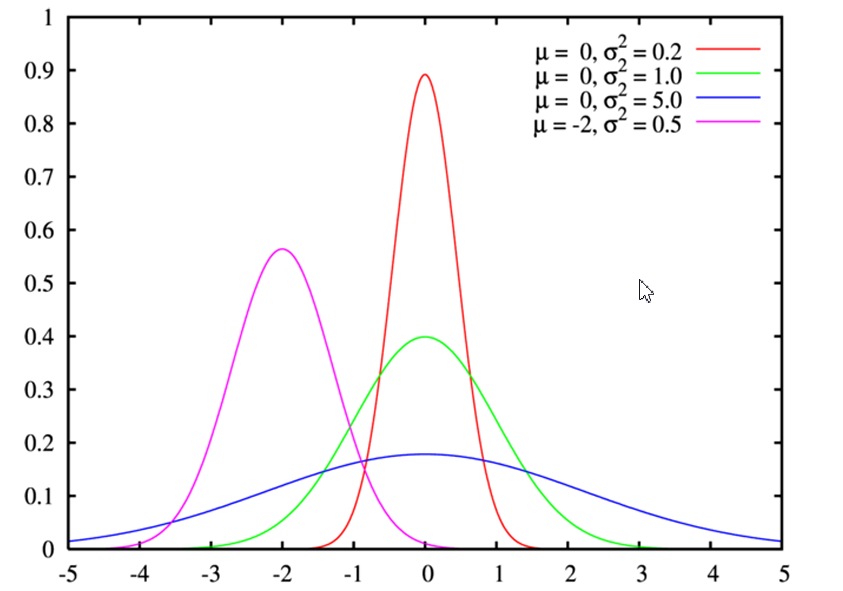

**Распределение Пуассона **

Распределение Пуассона тоже часто встречается в работе дата-сайентистов и ана
литиков: это число событий за какой-то промежуток времени — при условии, что
события независимы друг от друга и имеют некоторый порог интенсивности.

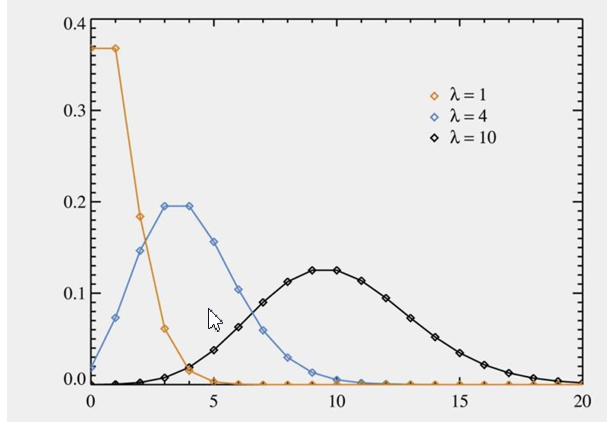

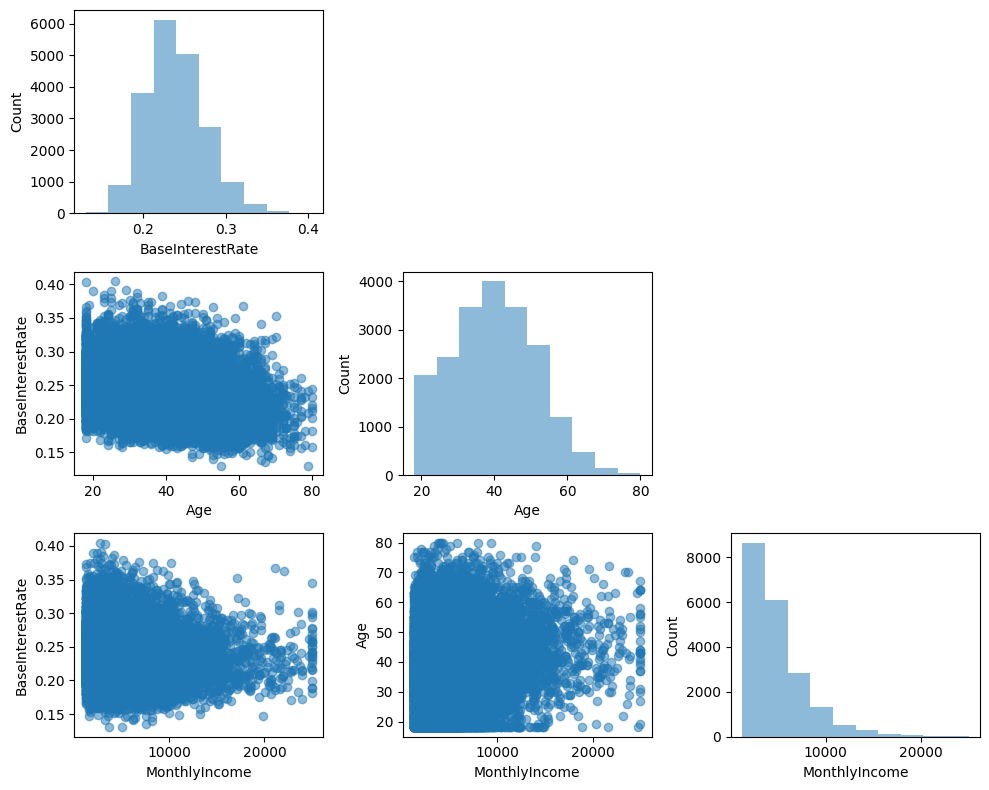

In [ ]:
from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['BaseInterestRate' , 'Age', 'MonthlyIncome']
scatterplotmatrix(FinRisk[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt. tight_layout()
plt.show()

<Axes: xlabel='LoanPurpose', ylabel='Experience'>

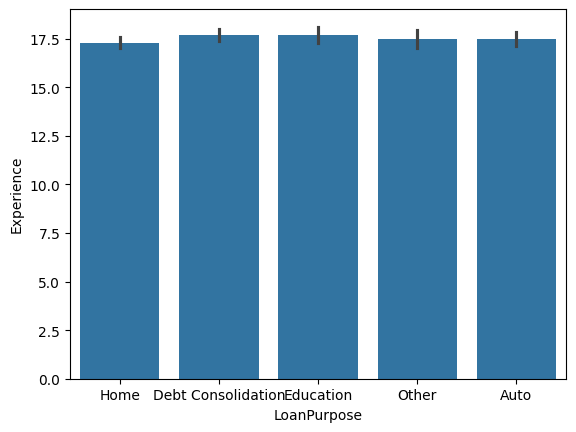

In [ ]:
sns.barplot(x='LoanPurpose', y='Experience', data=FinRisk)

In [ ]:
FinRisk.groupby("LoanPurpose", as_index=False).agg({"Age": "mean", "Experience": "mean"}).sort_values(by=["Age"], ascending=False).round(2).head(20)

,LoanPurpose,Age,Experience
1,Debt Consolidation,39.92,17.70
2,Education,39.92,17.71
0,Auto,39.78,17.49
4,Other,39.75,17.49
3,Home,39.51,17.30
